In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve, roc_auc_score
import time
from datetime import datetime
from math import pi,sin
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
data = pd.read_csv("train.csv")
data = data.astype({'hour' : 'int32', 'transport_mode' : 'int32'})

Nuevas Variables

In [3]:
data['date'] = pd.to_datetime(data['date'], format="%Y-%m-%d")
data['weekday'] = data['date'].dt.date.apply(lambda x: x.weekday())
data['weekend'] = np.where(data['weekday']>=5, 1, 0)
# wT = 2pi -> w = 0.8975979010256552 para hacerla circular
data['weekday'] = data['weekday'].apply(lambda x: sin(x*0.8975979010256552))
#data['month'] = data['date'].dt.date.apply(lambda x: x.month)
del data['date']
del data['sid']

In [4]:
#Put bT at the end
cols = data.columns.tolist()
cols.append(cols.pop(cols.index('weekend')))
cols.append(cols.pop(cols.index('transport_mode')))
cols.append(cols.pop(cols.index('binaryTarget')))
data = data[cols]

In [5]:
data.dtypes

hour                             int32
x_origin_0                     float64
y_origin_0                     float64
termicSensation_origin         float64
x_destination_0                float64
y_destination_0                float64
termicSensation_destination    float64
distance                       float64
price                          float64
eta                            float64
min_distance                   float64
min_price                      float64
min_eta                        float64
weekday                        float64
weekend                          int64
transport_mode                   int32
binaryTarget                   float64
dtype: object

Split Data

In [7]:
prop = 0.2/0.8
temp, test = train_test_split(data, test_size=0.2)
train, val = train_test_split(temp, test_size=prop)
del temp

In [9]:
x_train = train[train.columns[:-1]].values
y_train = train["binaryTarget"].values
x_val = val[val.columns[:-1]].values
y_val = val["binaryTarget"].values
x_test = test[test.columns[:-1]].values
y_test = test["binaryTarget"].values

Forest

In [71]:
clf = RandomForestClassifier(n_estimators=80 ,max_depth=None, random_state=2, verbose=0)

In [72]:
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [73]:
clf.score(x_val, y_val)

0.8426712997530297

In [74]:
clf.score(x_test, y_test)

0.8422428027855553

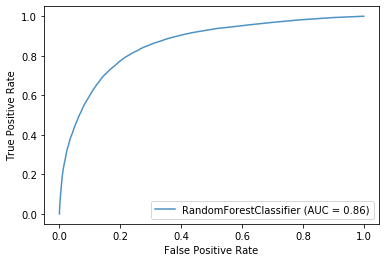

<Figure size 864x360 with 0 Axes>

In [75]:
ax = plt.gca()
clf_plot_test = plot_roc_curve(clf, x_test, y_test, ax=ax, alpha=0.8)
#clf_plot_val = plot_roc_curve(clf, x_val, y_val, ax=ax, alpha=0.8)
plt.figure(figsize=(12,5))
plt.show()

In [32]:
clf_plot_test.roc_auc

0.8653436714303813

In [59]:
%time
score1 = []
score2 = []
score3 = []
score5 = []
scoreNone = []
auc1 = []
auc2 = []
auc3 = []
auc5 = []
aucNone = []
n_trees = list(range(1,100))
for i in n_trees:
    rfc1 = RandomForestClassifier(n_estimators=i ,max_depth=1, random_state=2, verbose=0)
    rfc2 = RandomForestClassifier(n_estimators=i ,max_depth=2, random_state=2, verbose=0)
    rfc3 = RandomForestClassifier(n_estimators=i ,max_depth=3, random_state=2, verbose=0)
    rfc5 = RandomForestClassifier(n_estimators=i ,max_depth=5, random_state=2, verbose=0)
    rfcNone = RandomForestClassifier(n_estimators=i ,max_depth=None, random_state=2, verbose=0)
    rfc1.fit(x_train, y_train)
    rfc2.fit(x_train, y_train)
    rfc3.fit(x_train, y_train)
    rfc5.fit(x_train, y_train)
    rfcNone.fit(x_train, y_train)
    score1.append(rfc1.score(x_test, y_test))
    score2.append(rfc2.score(x_test, y_test))
    score3.append(rfc3.score(x_test, y_test))
    score5.append(rfc5.score(x_test, y_test))
    scoreNone.append(rfcNone.score(x_test, y_test))
    auc1.append(roc_auc_score(y_test, rfc1.predict(x_test)))
    auc2.append(roc_auc_score(y_test, rfc2.predict(x_test)))
    auc3.append(roc_auc_score(y_test, rfc3.predict(x_test)))
    auc5.append(roc_auc_score(y_test, rfc5.predict(x_test)))
    aucNone.append(roc_auc_score(y_test, rfcNone.predict(x_test)))
    print(str(i))

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.72 µs


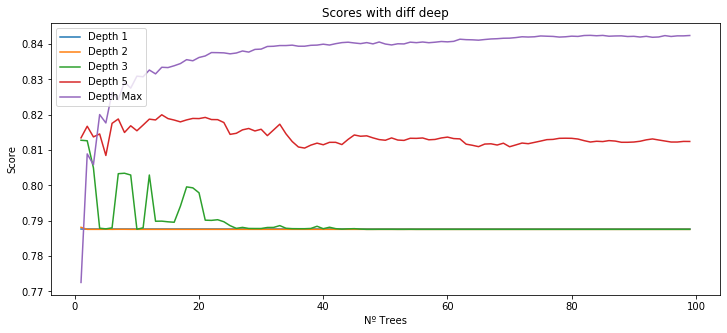

In [70]:
plt.figure(figsize=(12,5))
l1 = plt.plot(n_trees, score1, label='Depth 1')
l2 = plt.plot(n_trees, score2, label='Depth 2')
l3 = plt.plot(n_trees, score3, label='Depth 3')
l5 = plt.plot(n_trees, score5, label='Depth 5')
lNone = plt.plot(n_trees, scoreNone, label='Depth Max')
plt.title('Scores with diff deep')
plt.ylabel('Score')
plt.xlabel('Nº Trees')
plt.legend()

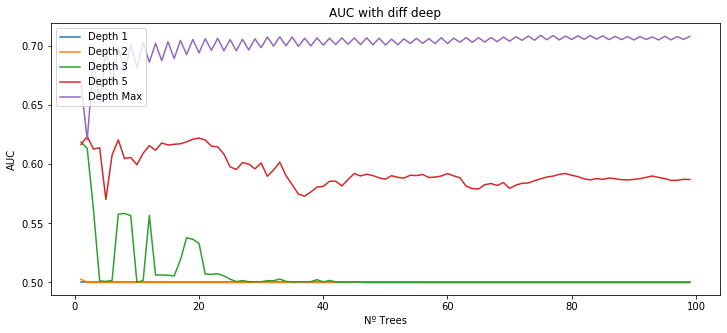

In [69]:
plt.figure(figsize=(12,5))
l1 = plt.plot(n_trees, auc1, label='Depth 1')
l2 = plt.plot(n_trees, auc2, label='Depth 2')
l3 = plt.plot(n_trees, auc3, label='Depth 3')
l5 = plt.plot(n_trees, auc5, label='Depth 5')
lNone = plt.plot(n_trees, aucNone, label='Depth Max')
plt.title('AUC with diff deep')
plt.ylabel('AUC')
plt.xlabel('Nº Trees')
plt.legend()